In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [3]:
df = pd.read_csv("credit_card_fraud_synthetic.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (1000, 8)


,Time,V1,V2,V3,V4,V5,Amount,Class
0,121958,-2.289061,-1.313758,-0.452562,-0.392802,0.224787,1600.89,0
1,146867,1.432482,-1.095302,-0.129910,-1.362911,-1.017335,4191.85,0
2,131932,1.214722,-0.168797,0.581433,0.699020,0.964415,3271.32,0
3,103694,-0.880864,0.110956,-0.203236,-0.243510,0.362543,1377.51,0
4,119879,-0.881879,0.786970,1.110118,0.015365,-1.135162,4838.72,0


In [4]:
print("Fraud vs Non-Fraud Count:")
print(df['Class'].value_counts())


Fraud vs Non-Fraud Count:
Class
0    982
1     18
Name: count, dtype: int64


In [5]:
X = df.drop('Class', axis=1)
y = df['Class']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [7]:
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)

y_pred_baseline = baseline_model.predict(X_test)

print("Baseline Model (Logistic Regression) Report:\n")
print(classification_report(y_test, y_pred_baseline))


Baseline Model (Logistic Regression) Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       196
           1       0.00      0.00      0.00         4

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.49       200
weighted avg       0.96      0.98      0.97       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Model Report:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Model Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       196
           1       0.00      0.00      0.00         4

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.49       200
weighted avg       0.96      0.98      0.97       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


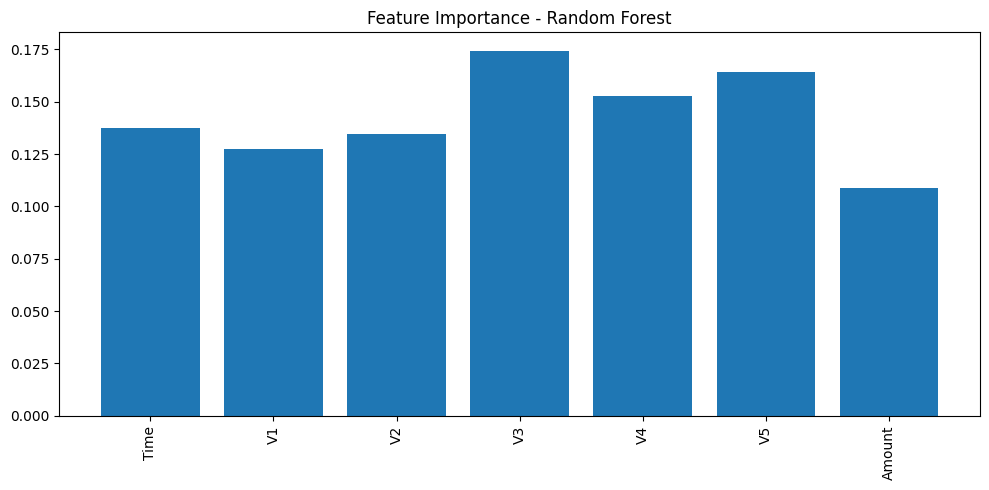

In [10]:
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10,5))
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()


In [11]:
joblib.dump(rf_model, "fraud_model.pkl")

print("Model saved as fraud_model.pkl")


Model saved as fraud_model.pkl
